# Underwater Image Generation

In this notebook the implemented UW image generation function written in file UWIG.py is used.

An image in the root folder is already loaded in this notebook. New images can be loaded in the load image block.

Input Image specifications : Image should be RGB-D where image is normal RGB image and its corresponding depth map is a 2D matrix with each pixel representing the ditance of pixel from camera in meters. 

All other parameters have been decribed below as required. 

water type = 0,1,,,8,9 (corresponding to Jerlovs water types: I,IA,IB,II,III,1C,3C,7C,9C)

camera type = 0,1,2 (0 : Nikon, 1 : Canon, 2 : Mobile(grasshopper))

d = vertical distace from surface of water

image matrix in BGR format (as read in by cv2)

A neutral background color has been given to function B_clr = (0.75,0.75,0.45)

To change the background color please change in the .py file in function "generate_uw" with constraints: B_clr max for blue, green and red respectively = 0.8,0.8,0.5 and B_clr min for blue, green and red respectively = 0.7,0.7,0.4


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from UWIG import *

In [34]:
def display(img):
    # if image is bgr(as read in by CV2), convert it to rgb for display by matplotlib 
    if(img.ndim==3):
        img = img[:,:,::-1]
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    
#convert depth map given in meters to [0-255] to view as image
def display_depth(depth1):
    depth_image = (depth1 - np.min(depth1)) / np.max(depth1)
    depth_image = (depth_image * 255).astype(np.uint8)
    plt.figure(figsize = (5,5))
    plt.imshow(depth_image, cmap='Spectral')
    plt.axis('off')
    

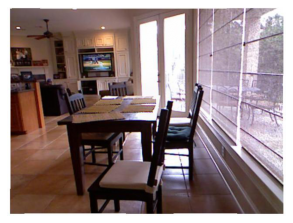

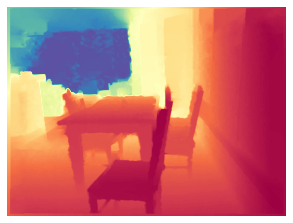

In [35]:
#load image 1
#CV2 loads image in BGR format
image1 = cv2.imread('img800.jpg')
image1 = image1/255
display(image1)
#load depth map
depth1 = np.genfromtxt('depth800.csv', delimiter=',')
display_depth(depth1)

In [40]:
water_type = ['I','IA','IB','II','III','1C','3C','5C','7C','9C']

#water type = 0,1,,,8,9 [corresponding to Jerlovs water types: I,IA,IB,II,III,1C,3C,7C,9C]
#camera type = 0,1,2 [0 : Nikon, 1 : Canon, 2 : Mobile(grasshopper)]
#d = vertical distace from surface of water
#img = image matrix in BGR format (as read in by cv2)
#depth_map = depth map (each pixel in meter) 
def gen_uw(img,depth_map,cam_type,depth):  
    fig, axes = plt.subplots(2, 5, figsize=(25,9))
    for i in range(10):
        uw_img = generate_uw(img, depth_map, i, cam_type, depth)
        uw_img = uw_img[:,:,::-1]
        axes[i//5,i%5].imshow(uw_img)
        axes[i//5,i%5].set_axis_off()
        axes[i//5,i%5].set_title(water_type[i])
    plt.show()

## Results:

Input parameters can be changed to produce different results.

Generating a single image using function "uw_image":

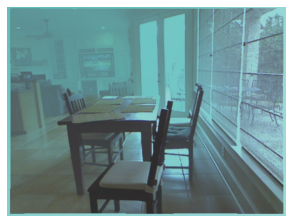

In [44]:
uw_image = generate_uw(image1, depth1, 5, 2, 0.5)
display(uw_image)

Calling the function "gen_uw" to generate images for all ten water types:

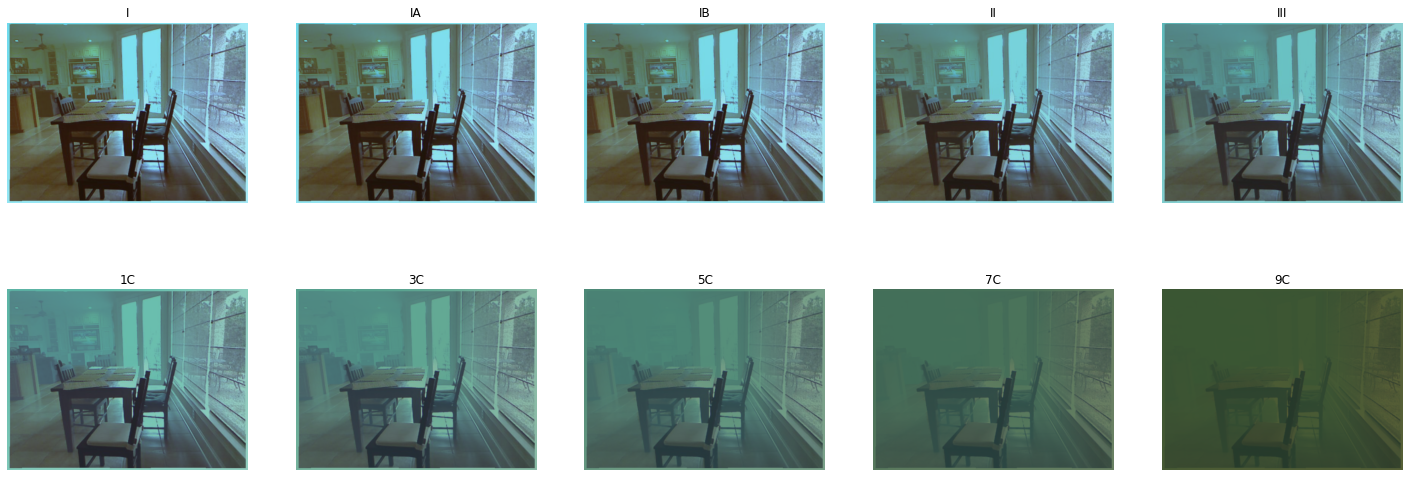

In [41]:
gen_uw(image1,depth1,0,1)